### Wstęga (fraktal) Newtona


In [2]:
import numpy as np
from PIL import Image

In [3]:
def get_colors(x):
    colors = [[255,0,0],[0,255,0],[0,0,255],
              [255,255,0],[0,255,255],[255,0,255],
             [255,128,0],[0,255,128],[128,0,255]]
    return colors[:x]
# red, blue, green, yellow, cyan, magenta, orange, lime, violet

In [4]:
def calculate_color(p, dp, roots, z, colors, max_iters):
    result = None
    result_i = max_iters
    eps = 0.0000001
    
    for i in range(max_iters):
        diffs = [(np.abs(root - z), color) for (root, color) in zip(roots, colors)]
        near_zero = list(filter(lambda x : x[0] < eps, diffs))
        
        if len(near_zero) > 0:
            result_i = i
            result = near_zero[0][1]
            break
        
        if np.abs(dp(z)) < eps:
            break
            
        z -= p(z)/dp(z)
        
    if result is None:
        return [0, 0, 0]
    
    eff = 1.0 - (result_i / max_iters)
    return [np.uint8(eff * x) for x in result]

In [5]:
def draw_fractal(p, xrange, yrange, resolution, max_iters):
    roots = p.roots
    dp = np.poly1d(np.polyder(p.coef))
    colors = get_colors(len(roots))
    
    bitmap = np.ndarray(shape=(resolution[1], resolution[0], 3), dtype=np.uint8)
    
    xrange[1] -= xrange[0]
    yrange[1] -= yrange[0]
    for row in range(resolution[1]):
        for col in range(resolution[0]):
            x = (col / resolution[0]) * xrange[1] + xrange[0]
            y = (row / resolution[1]) * yrange[1] + yrange[0]
            z = complex(x, y)
            bitmap[row][col] = calculate_color(p, dp, roots, z, colors, max_iters)
            
    return bitmap

In [6]:
# Tu można podać dowolny wielomian
poly = np.poly1d([1.,0.,0.,-15.,0.,0.,0.,-16.])

In [7]:
bitmap = draw_fractal(poly, [-2,2], [-2,2], [400,400], 15)

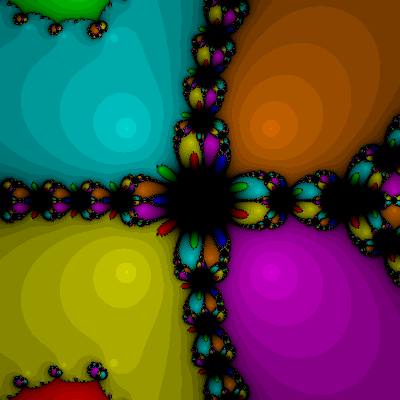

In [8]:
Image.fromarray(bitmap)